In [225]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [155]:
url = 'https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv'
df = pd.read_csv(url)
df=pd.DataFrame(df)
df = df.drop(columns = ['Country'])
df.set_index(['Happiness Rank'], drop= True, inplace=True)
df.head(50)
#loading data into the object
#removed country as all the names are different. They might as well be indicated by their index with no information loss.
#The data is mostly continuous with an exception of Region

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,,
1,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
3,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
4,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
6,Western Europe,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
7,Western Europe,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
8,Western Europe,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
9,Australia and New Zealand,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425


In [156]:
df.describe()
#The data looks non-normal in standard error, Family, Health, Trust and Generosity

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [90]:
df.isna().sum() #checking for na
#No na found

Country                          0
Region                           0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [157]:
df.info() #taking the basic info.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Region                         158 non-null    object 
 1   Happiness Score                158 non-null    float64
 2   Standard Error                 158 non-null    float64
 3   Economy (GDP per Capita)       158 non-null    float64
 4   Family                         158 non-null    float64
 5   Health (Life Expectancy)       158 non-null    float64
 6   Freedom                        158 non-null    float64
 7   Trust (Government Corruption)  158 non-null    float64
 8   Generosity                     158 non-null    float64
 9   Dystopia Residual              158 non-null    float64
dtypes: float64(9), object(1)
memory usage: 13.6+ KB


In [92]:
df.columns 
#Checking the columns of factors and labels

Index(['Country', 'Region', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [24]:
df.loc[df['Country']==' '] #checking for spaces in data that might be blank. No blanks found

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [25]:
df.loc[df['Region']==' '] #checking for spaces in data that might be blank. No blanks found

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [26]:
df.loc[df['Happiness Rank']==' '] #checking for spaces in data that might be blank. No blanks found

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [27]:
df.loc[df['Happiness Score']==' '] #checking for spaces in data that might be blank. No blanks found

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [28]:
df.loc[df['Standard Error']==' '] #checking for spaces in data that might be blank. No blanks found

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [29]:
df.loc[df['Economy (GDP per Capita)']==' '] #checking for spaces in data that might be blank. No blanks found

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [30]:
df.loc[df['Family']==' '] #checking for spaces in data that might be blank. No blanks found

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [31]:
df.loc[df['Health (Life Expectancy)']==' '] #checking for spaces in data that might be blank. No blanks found

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [32]:
df.loc[df['Freedom']==' '] #checking for spaces in data that might be blank. No blanks found

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [33]:
df.loc[df['Trust (Government Corruption)']==' '] #checking for spaces in data that might be blank. No blanks found

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [34]:
df.loc[df['Generosity']==' '] #checking for spaces in data that might be blank. No blanks found

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [35]:
df.loc[df['Dystopia Residual']==' '] #checking for spaces in data that might be blank. No blanks found

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [230]:
from sklearn.preprocessing import OrdinalEncoder
ohe = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes =='object':
        df[i] = ordenc.fit_transform(df[i].values.reshape(-1,1))
        df = pd.DataFrame(df)
df

#Encoding 'Region' into continuous data using ordinal values. 

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,,
1,9.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,9.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
3,9.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
4,9.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
154,8.0,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
155,8.0,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
156,4.0,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


<AxesSubplot:>

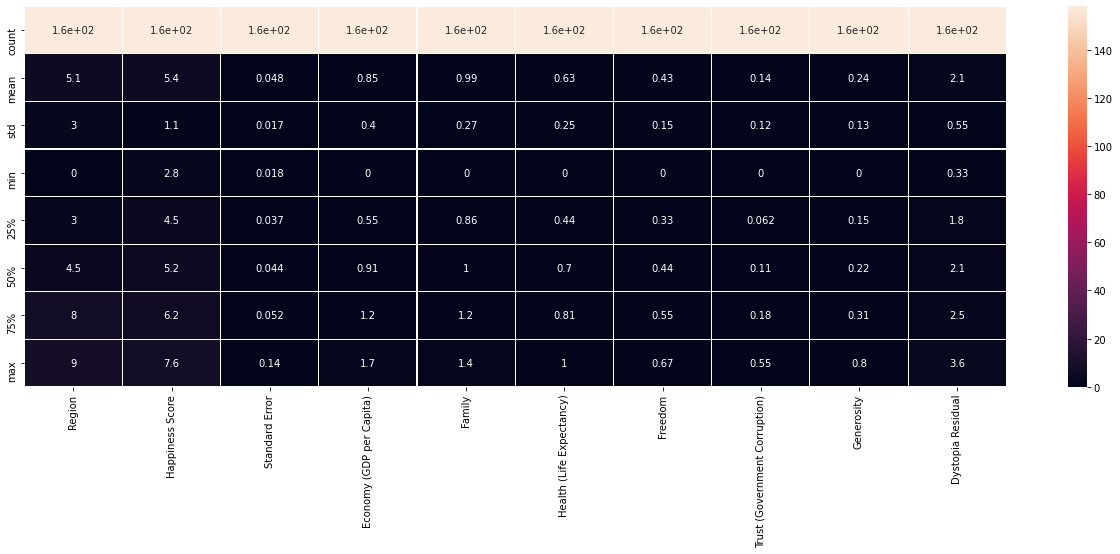

In [164]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(), annot=True, linewidths=0.1) 

In [165]:
df.corr()
#checking for correlation between factors and the label

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,1.000000,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Score,-0.176791,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.022600,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.260139,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.168533,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.357508,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.092567,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.165040,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.273557,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.057276,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

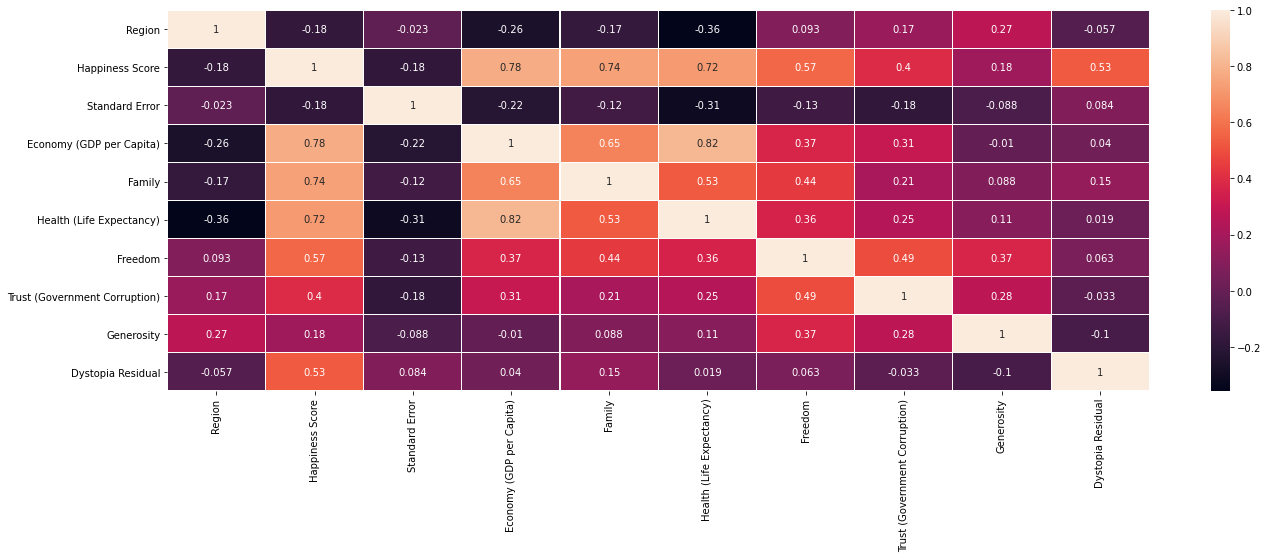

In [166]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.1)
#Correlation of Happiness Score with Economy(GDP per Capita), Family, Health and Freedom is high
#Correlation of Happiness Score with Generosity, Standard Error, and Region is low

C:\Users\ddhir\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ddhir\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ddhir\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

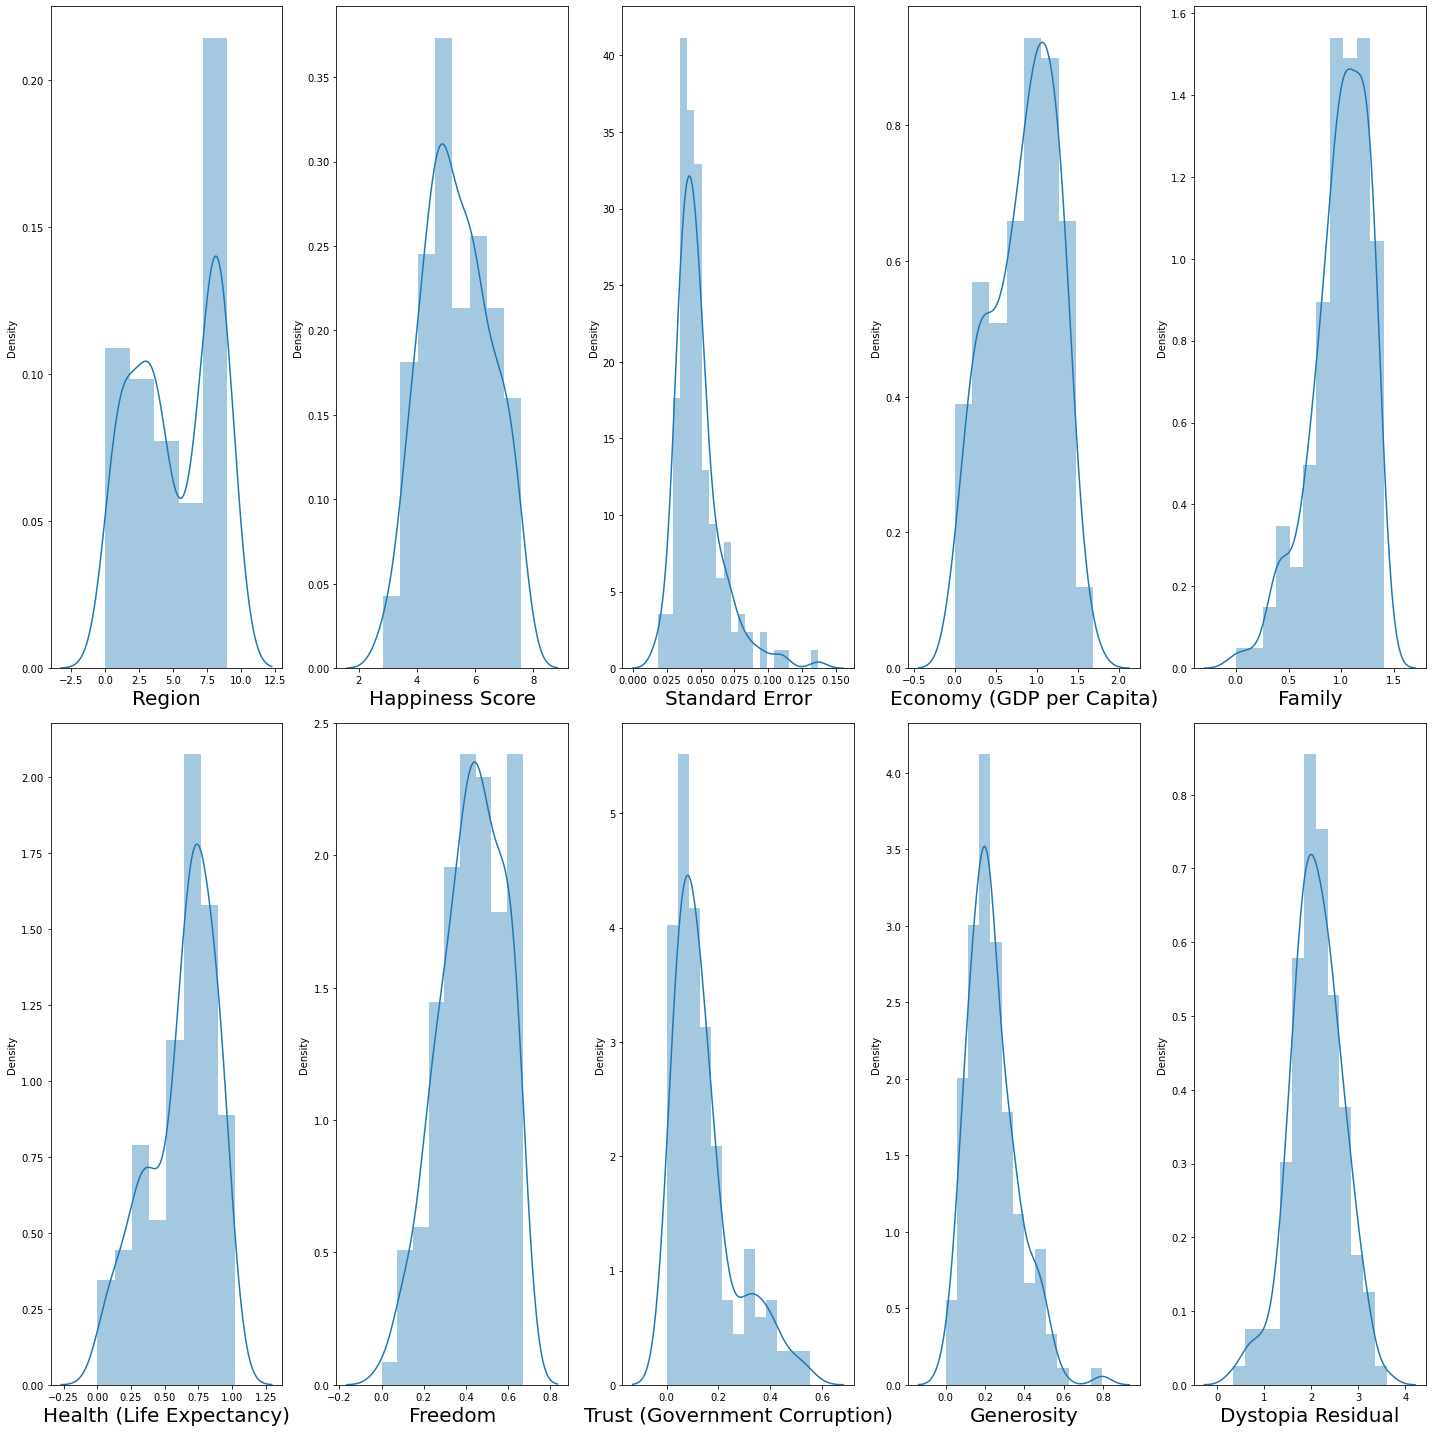

In [167]:
plt.figure(figsize=(20,20))
plotnumber = 1
for c in df:
    ax= plt.subplot(2,5,plotnumber)
    sns.distplot(df[c])  
    plt.xlabel(c,fontsize=20) 
    plotnumber+=1
plt.tight_layout()
#Skewness is observed in Standard Error, Family, Health, Trust and Generosity

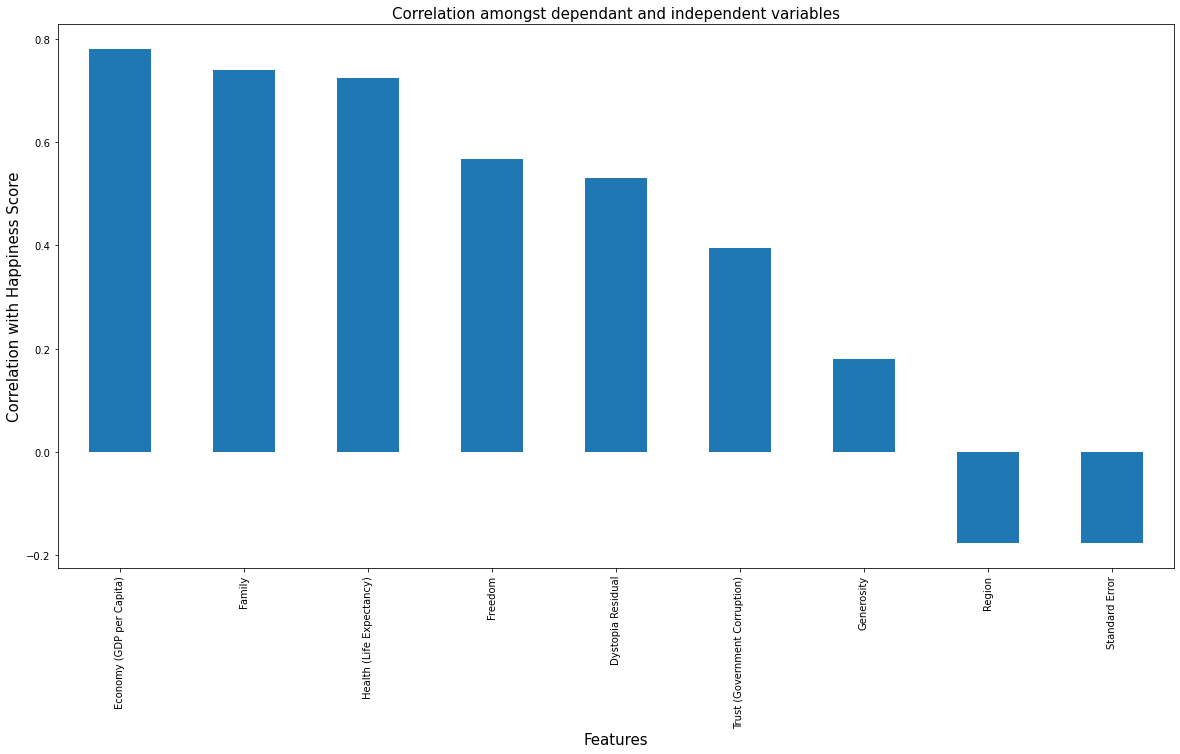

In [168]:
df2 = df.corr()
plt.figure(figsize=(20,10))
df2['Happiness Score'].sort_values(ascending=False).drop(['Happiness Score']).plot(kind='bar')
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Correlation with Happiness Score', fontsize = 15)
plt.title('Correlation amongst dependant and independent variables', fontsize = 15)
plt.show()
#Correlation of Happiness Score with Economy(GDP per Capita), Family, Health Freedom and Dystopia Residual is high
#Correlation of Happiness Score with Generosity, Standard Error, and Region is low

In [169]:
df.skew()
#the high skewness in standard error, Family, Health, Trust and Generosity needs to be fixed. (>0.5 or <-0.5)

Region                          -0.116119
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [178]:
X = df.drop(columns = ['Happiness Score'])
y = df['Happiness Score']
X1 = X.drop(columns = ['Region'])
X1.shape
#We drop region as it is categorical data and need not be treated for skewness

(158, 8)

In [208]:
X1

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,
1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


In [179]:
from scipy.stats import zscore
z=np.abs(zscore(X1))
xnew=X1[(z<3).all(axis=1)]
xnew.shape

(149, 8)

C:\Users\ddhir\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ddhir\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ddhir\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

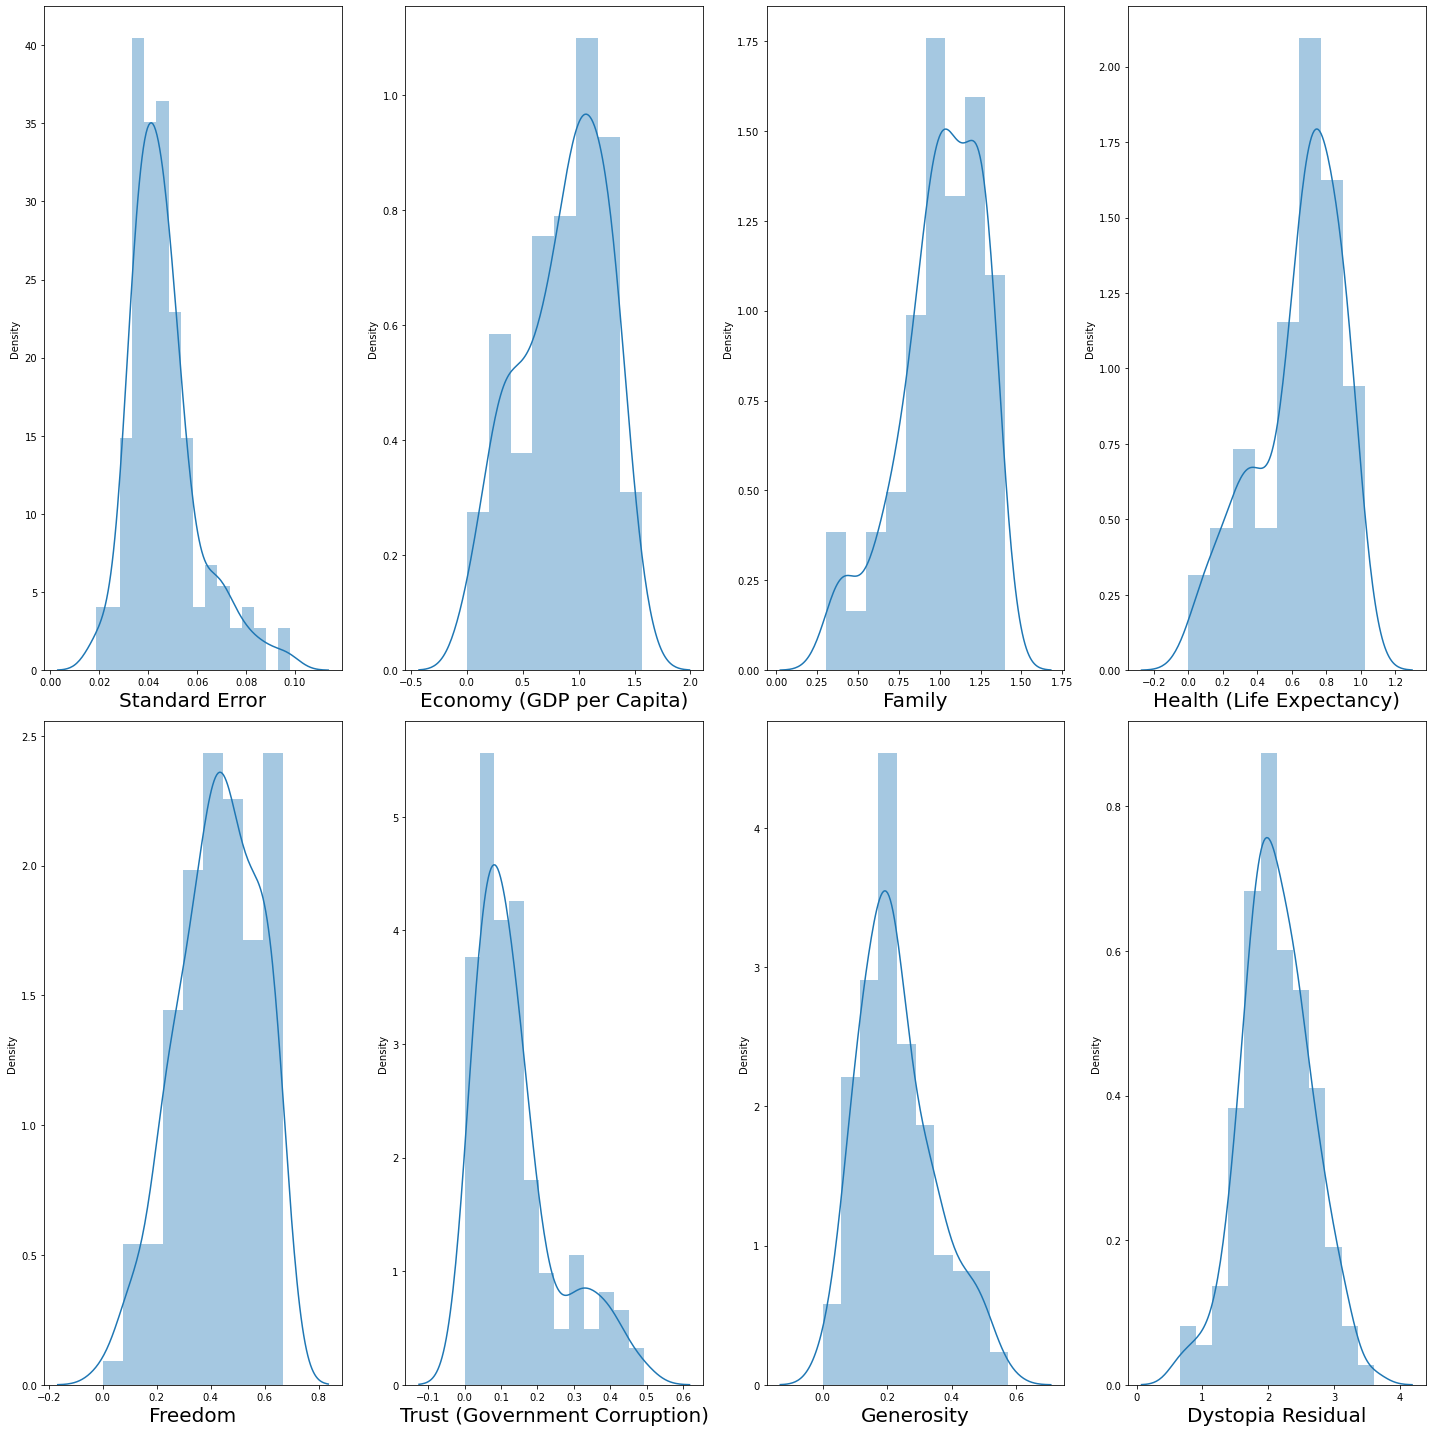

In [209]:
plt.figure(figsize=(20,20))
plotnumber = 1
for c in xnew:
    ax= plt.subplot(2,4,plotnumber)
    sns.distplot(xnew[c])  
    plt.xlabel(c,fontsize=20) 
    plotnumber+=1
plt.tight_layout()
#The outliers are not taken care of and neither is the skewness lost

In [181]:
xnew.skew()
#zscore falis to remove skewness

Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [186]:
X2 = X1.copy()
X2['Standard Error'] = np.log(X2['Standard Error'])
X2['Economy (GDP per Capita)'] = np.log(X2['Economy (GDP per Capita)'])
X2['Family'] = np.log(X2['Family'])
X2['Health (Life Expectancy)'] = np.log(X2['Health (Life Expectancy)'])
X2['Freedom'] = np.log(X2['Freedom'])
X2['Trust (Government Corruption)'] = np.log(X2['Trust (Government Corruption)'])
X2['Generosity'] = np.log(X2['Generosity'])
X2['Dystopia Residual'] = np.log(X2['Dystopia Residual'])
X2.skew()
#not able to calculate the skewness of some data as Log is adding some 'NaN' data to the dataset

C:\Users\ddhir\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Standard Error                   0.484623
Economy (GDP per Capita)              NaN
Family                                NaN
Health (Life Expectancy)              NaN
Freedom                               NaN
Trust (Government Corruption)         NaN
Generosity                            NaN
Dystopia Residual               -1.968990
dtype: float64

In [205]:
X3 = X1.copy()
from scipy import stats
X3['Standard Error'] = np.cbrt(X3['Standard Error'])
X3['Economy (GDP per Capita)'] = np.cbrt(X3['Economy (GDP per Capita)'])
X3['Family'] = np.cbrt(X3['Family'])
X3['Health (Life Expectancy)'] = np.cbrt(X3['Health (Life Expectancy)'])
X3['Freedom'] = np.cbrt(X3['Freedom'])
X3['Trust (Government Corruption)'] = np.cbrt(X3['Trust (Government Corruption)'])
X3['Generosity'] = np.cbrt(X3['Generosity'])
X3['Dystopia Residual'] = np.cbrt(X3['Dystopia Residual'])
X3.skew()
#The skew is not removed. Rejected

Standard Error                   0.979748
Economy (GDP per Capita)        -1.493004
Family                          -3.573056
Health (Life Expectancy)        -1.981292
Freedom                         -2.278205
Trust (Government Corruption)    0.011932
Generosity                      -0.961079
Dystopia Residual               -1.228430
dtype: float64

In [210]:
X4= X1.copy()
X4['Standard Error'] = np.sqrt(X4['Standard Error'])
X4['Economy (GDP per Capita)'] = np.sqrt(X4['Economy (GDP per Capita)'])
X4['Family'] = np.sqrt(X4['Family'])
X4['Health (Life Expectancy)'] = np.sqrt(X4['Health (Life Expectancy)'])
X4['Freedom'] = np.sqrt(X4['Freedom'])
X4['Trust (Government Corruption)'] = np.sqrt(X4['Trust (Government Corruption)'])
X4['Generosity'] = np.sqrt(X4['Generosity'])
X4['Dystopia Residual'] = np.sqrt(X4['Dystopia Residual'])
X4.skew()
#The skew is not removed. Rejected

Standard Error                   1.225889
Economy (GDP per Capita)        -0.993782
Family                          -2.193070
Health (Life Expectancy)        -1.380270
Freedom                         -1.280762
Trust (Government Corruption)    0.507663
Generosity                      -0.130961
Dystopia Residual               -0.930564
dtype: float64

In [256]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
X5= X1.copy()
X5= power.fit_transform(X5)
X5 = pd.DataFrame(X5)
X5.columns = X1.columns
X5.skew()
#The skew is corrected by yoe-johnson method. Accepted

Standard Error                  -0.020092
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.080728
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual                0.022925
dtype: float64

In [257]:
X5.shape
# no data loss. Accepted

(158, 8)

C:\Users\ddhir\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ddhir\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ddhir\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

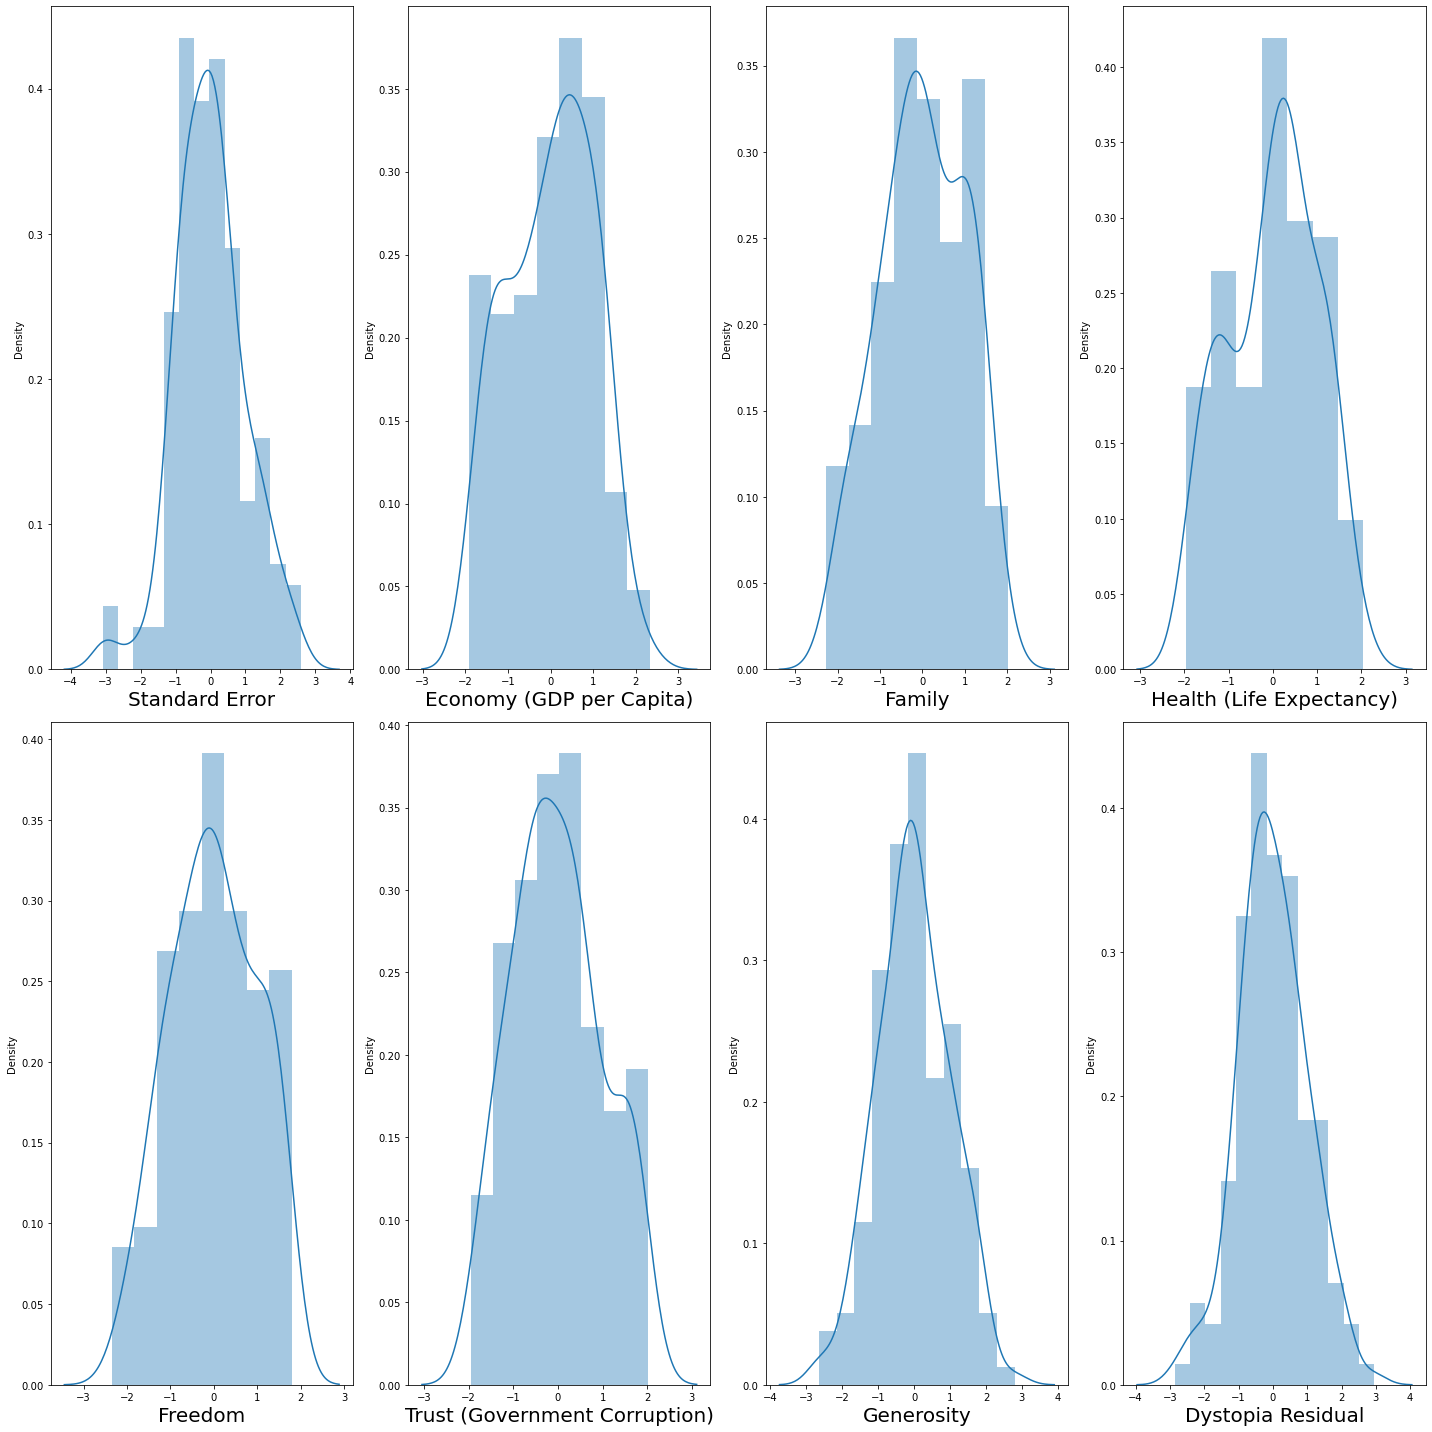

In [216]:
plt.figure(figsize=(20,20))
plotnumber = 1
for c in X5:
    ax= plt.subplot(2,4,plotnumber)
    sns.distplot(X5[c])  
    plt.xlabel(c,fontsize=20) 
    plotnumber+=1
plt.tight_layout()
#All graphs looking similar to normal distribution. Accepted

In [297]:
y.columns = ['Happiness Score']

In [298]:
y

Happiness Rank
1      7.587
2      7.561
3      7.527
4      7.522
5      7.427
       ...  
154    3.465
155    3.340
156    3.006
157    2.905
158    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [253]:
XF = X['Region']
XF = list(XF)
len(XF)

158

In [269]:
X5['Region'] = XF
X5
#Adding region back to the dataset after treating the data

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Region
0,-0.972226,1.446061,1.669206,1.491765,1.756335,1.773991,0.622391,0.750992,9.0
1,0.309350,1.173321,2.012132,1.532348,1.439946,0.315993,1.480995,1.110011,9.0
2,-1.062017,1.239836,1.739586,1.085223,1.615733,1.906792,0.927973,0.702275,9.0
3,-0.503610,1.630246,1.553118,1.147600,1.792821,1.624007,0.964080,0.651035,9.0
4,-0.823548,1.242168,1.501726,1.270179,1.475479,1.503484,1.592224,0.625118,5.0
...,...,...,...,...,...,...,...,...,...
153,-0.916014,-1.494046,-0.959885,-0.939459,1.135229,2.012856,0.065304,-2.393259,8.0
154,-0.719479,-1.360829,-1.896644,-1.276496,0.307514,-0.433835,-0.334169,-0.863565,8.0
155,0.399137,-0.513469,-1.690664,0.262933,-1.668658,0.738915,1.659336,-2.866216,4.0
156,1.926902,-1.894954,-1.796803,-1.525700,-1.849903,-0.151946,-0.194829,-0.514801,8.0


In [260]:
X5.skew()

Standard Error                  -0.020092
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.080728
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual                0.022925
Region                          -0.116119
dtype: float64

In [271]:
#didn't eventually scale 'region' as the score of selectkbest did not change
X5

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Region
0,-0.972226,1.446061,1.669206,1.491765,1.756335,1.773991,0.622391,0.750992,9.0
1,0.309350,1.173321,2.012132,1.532348,1.439946,0.315993,1.480995,1.110011,9.0
2,-1.062017,1.239836,1.739586,1.085223,1.615733,1.906792,0.927973,0.702275,9.0
3,-0.503610,1.630246,1.553118,1.147600,1.792821,1.624007,0.964080,0.651035,9.0
4,-0.823548,1.242168,1.501726,1.270179,1.475479,1.503484,1.592224,0.625118,5.0
...,...,...,...,...,...,...,...,...,...
153,-0.916014,-1.494046,-0.959885,-0.939459,1.135229,2.012856,0.065304,-2.393259,8.0
154,-0.719479,-1.360829,-1.896644,-1.276496,0.307514,-0.433835,-0.334169,-0.863565,8.0
155,0.399137,-0.513469,-1.690664,0.262933,-1.668658,0.738915,1.659336,-2.866216,4.0
156,1.926902,-1.894954,-1.796803,-1.525700,-1.849903,-0.151946,-0.194829,-0.514801,8.0


In [266]:
from sklearn.feature_selection import SelectKBest, f_classif

In [270]:
bf= SelectKBest(score_func = f_classif, k=5) #number of top features to select.
fit = bf.fit(X5,y)
X5_scores=pd.DataFrame(fit.scores_)
X5_columns=pd.DataFrame(X.columns)

#concatenate dataframes
feature_scores = pd.concat([X5_columns, X5_scores], axis=1) #merging 2 dataframes
feature_scores.columns = ['Feature name', 'Score'] #naming the columns
print(feature_scores.nlargest(10,'Score')) #print 10 best features based on scores
#The impact of region stays the same, scaled or not

                    Feature name         Score
5                        Freedom  2.225052e+07
3                         Family  1.036187e+02
1                 Standard Error  5.673117e+01
7                     Generosity  1.277465e+01
0                         Region  8.159265e+00
6  Trust (Government Corruption)  6.440622e+00
2       Economy (GDP per Capita)  5.574008e+00
8              Dystopia Residual  1.997458e+00
4       Health (Life Expectancy)  1.180308e+00


In [272]:
X5_train, X5_test, y_train, y_test = train_test_split(X5,y, test_size = 0.25, random_state = 55)

In [273]:
reg = LinearRegression()
reg.fit(X5_train, y_train)
#Performing linear regression

LinearRegression()

In [274]:
y_pred = reg.predict(X5_test)

Text(0, 0.5, 'Predicted')

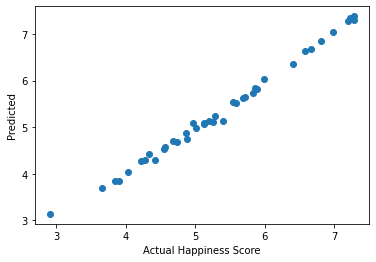

In [294]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted')
#The graph shows very high accuracy

In [286]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))
#Accuracy is 99.35%. Good model

0.993591511265786


In [287]:
#Cross validating using lasso and ridge CV
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV 
lcv = LassoCV(alphas = None, max_iter = 1000, normalize = True)
lcv.fit(X5_train, y_train)
alpha = lcv.alpha_
alpha

0.00029979405557091363

In [289]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(X5_train, y_train)
lasso_reg.score(X5_test, y_test)
#Similar accuracy to linear regression

0.9936207145763707

In [296]:
rcv = RidgeCV(alphas = np.arange(0.001, 0.1, 0.01), normalize = True)
rcv.fit(X5_train, y_train)
al = rcv.alpha_
al

0.001

In [292]:
ridge_reg = Ridge(al)
ridge_reg.fit(X5_train, y_train)

Ridge(alpha=0.001)

In [293]:
ridge_reg.score(X5_test, y_test)
#Similar accuracy to linear regression
#Cross validation successful

0.9935915515002529

In [299]:
#Since we are getting an accuracy above 99.35% in all models, we stick with the linear regression model

In [301]:
#Saving the model to the local file system

filename = 'WHI.pickle'
pickle.dump(reg, open(filename, 'wb'))